In [162]:
import numpy as np 
import cv2 
import os
import csv
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib 
import matplotlib.colors as colors
from PIL import Image
from __future__ import print_function
import argparse
from IPython.display import Image
from IPython.display import display
import math




In [163]:
file_path = "C:/Users/aya-k/OneDrive/Bureau/VMI_M2/Projet_image/Visucule_Segmentation_with_ControurRegularisation"
image5_Path ="5_Vesicule.jpg"
image6_Path ="6_Vesicule.jpg"
image7_Path ="7_Vesicule.jpg"

points5_file="5_VesiculePoints.csv"
points6_file="6_VesiculePoints.csv"
points7_file="7_VesiculePoints.csv"

CenterP5_file="5_CoordinateCenter.csv"
CenterP6_file="6_CoordinateCenter.csv"
CenterP7_file="7_CoordinateCenter.csv"


In [213]:
def displaySideBySide(images,NUM_ROWS,IMGs_IN_ROW,title):
    
    f, ax_arr = plt.subplots(NUM_ROWS, IMGs_IN_ROW, figsize=(16,6))

    for i, image in enumerate(images):
        ax_arr[i].imshow(cv2.cvtColor(image,cv2.COLOR_BGR2RGB))
        ax_arr[i].set_title('image '+ str(i))

    
    f.suptitle(title, fontsize=16)
    plt.tight_layout()
    plt.show()




In [215]:
def displayInLine(images,NUM_ROWS,IMGs_IN_ROW,title):
    f, ax_arr = plt.subplots(NUM_ROWS, IMGs_IN_ROW, figsize=(20,20))

    for j, row in enumerate(ax_arr):
        for i, ax in enumerate(row):
            ax.imshow(cv2.cvtColor(images[j*IMGs_IN_ROW+i], cv2.COLOR_BGR2RGB))
            ax.set_title('')

    
    f.suptitle(title, fontsize=16)
    plt.show()  



In [166]:
image5= cv2.imread(os.path.join(file_path,image5_Path))
image6= cv2.imread(os.path.join(file_path,image6_Path))
image7= cv2.imread(os.path.join(file_path,image7_Path))
imagesInitials=[image5,image6,image7]

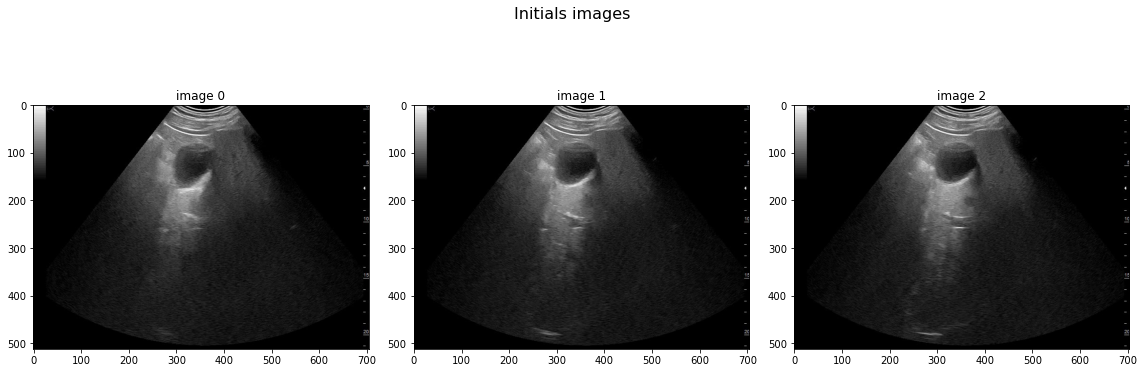

In [214]:


displaySideBySide(imagesInitials,1,3,"Initials images")


In [168]:
#Read the csv points files
points5_df = pd.read_csv(os.path.join(file_path,points5_file),sep=";")
points6_df = pd.read_csv(os.path.join(file_path,points6_file),sep=";")
points7_df = pd.read_csv(os.path.join(file_path,points7_file),sep=";")



In [169]:
#Read the centers points files 
CP5_df=pd.read_csv(os.path.join(file_path,CenterP5_file),sep=";")
CP6_df=pd.read_csv(os.path.join(file_path,CenterP6_file),sep=";")
CP7_df=pd.read_csv(os.path.join(file_path,CenterP7_file),sep=";")

In [170]:
CP5_df.head()

X Coordinate  Y Coordinate
0           346           129

In [171]:
CP6_df.head()
CP6_df.keys()

Index(['X Coordinate', 'Y Coordinate'], dtype='object')

In [172]:
CP7_df.head()
CP7_df.keys()

Index(['X Coordinate', 'Y Coordinate'], dtype='object')

In [173]:
points5_df.head()


Angle     x    y
0       0  392  129
1       2  391  130
2       4  363  130
3       6  364  130
4       8  386  134

In [216]:
#plot the center point on the images 
#plot center on image 5
# Get the center coordinate.
x_center=int(CP5_df.get(['X Coordinate'][0]) )
y_center =int(CP5_df.get(['Y Coordinate'][0]))

imgpltC5=image5.copy()
imgpltC5 = cv2.circle(imgpltC5, (x_center,y_center), radius=0, color=(255, 0, 0), thickness=10)

#plot center on image 6
# Get the center coordinate.
x_center=int(CP6_df.get(['X Coordinate'][0]) )
y_center =int(CP6_df.get(['Y Coordinate'][0]))

imgpltC6=image6.copy()
imgpltC6 = cv2.circle(imgpltC6, (x_center,y_center), radius=0, color=(255, 0, 0), thickness=10)


#plot center on image 7
# Get the center coordinate.
x_center=int(CP7_df.get(['X Coordinate'][0]) )
y_center =int(CP7_df.get(['Y Coordinate'][0]))

imgpltC7 =image7.copy()
imgpltC7 = cv2.circle(imgpltC7, (x_center,y_center), radius=0, color=(255, 0, 0), thickness=10)

imagesCenters=[imgpltC5,imgpltC6,imgpltC7]
displaySideBySide(imagesCenters,1,3,"Images with their center point")




Plot initals points on the images

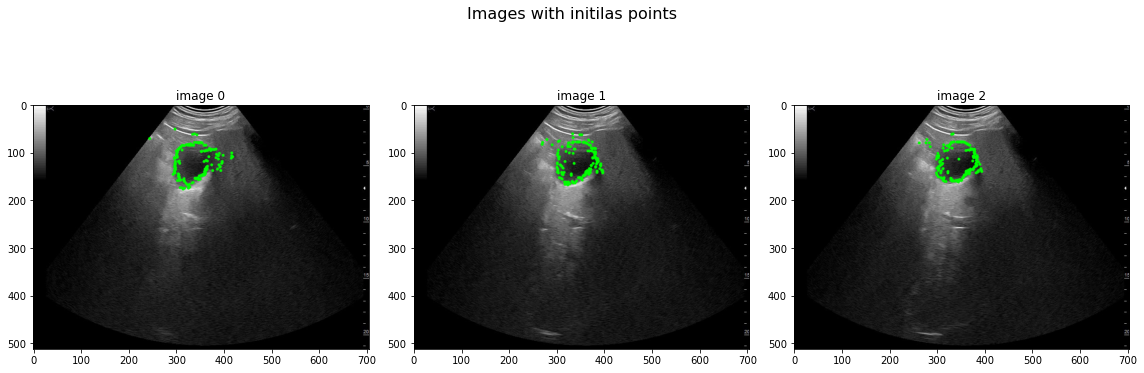

In [217]:
#Plot points for image 5
data = points5_df.values
imgplt5 = image5.copy()
for i in range(len(data)):
    x=data[i][1]
    y=data[i][2]
    imgplt5= cv2.circle(imgplt5, (x,y), radius=0, color=(0, 255, 0), thickness=5)

#Plot points for image 6
data = points6_df.values
imgplt6 = image6.copy()
for i in range(len(data)):
    x=data[i][1]
    y=data[i][2]
    imgplt6= cv2.circle(imgplt6, (x,y), radius=0, color=(0, 255, 0), thickness=5)



#Plot points for image 7
data = points7_df.values
imgplt7 = image7.copy()
for i in range(len(data)):
    x=data[i][1]
    y=data[i][2]
    imgplt7= cv2.circle(imgplt7, (x,y), radius=0, color=(0, 255, 0), thickness=5)


imagesPoints=[imgplt5,imgplt6,imgplt7]

displaySideBySide(imagesPoints,1,3,"Images with initilas points")





Dilatation function 

In [176]:
def Dilation(src,dilatation_size):

    dilatation_type = cv2.MORPH_RECT
    #title_dilatation_window = 'Dilation Demo'


    element = cv2.getStructuringElement(dilatation_type, (2*dilatation_size + 1, 2*dilatation_size+1), (dilatation_size,                  dilatation_size))

    dilatation_dst = cv2.dilate(src, element)
    return(dilatation_dst)
    


In [177]:
#Return an image labeled by colors of the diffrent connected components 

def display_components(labels):    
    # Map component labels to hue val
    label_hue = np.uint8(179*labels/np.max(labels))
    blank_ch = 255*np.ones_like(label_hue)
    labeled_img = cv2.merge([label_hue, blank_ch, blank_ch])

    # cvt to BGR for display
    labeled_img = cv2.cvtColor(labeled_img, cv2.COLOR_HSV2BGR)

    # set bg label to black
    labeled_img[label_hue==0] = 0
    return(labeled_img)



Method 2 ://////////////////////////////////////////////////////////////////////////////////////////////

In [178]:
    # Convert BGR to HSV
    def getColorComponenet(lower_color,upper_color,image):
        hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
        # Threshold the HSV image to get only blue colors
        mask = cv2.inRange(hsv, lower_color, upper_color)
        # Bitwise-AND mask and original image
        res = cv2.bitwise_and(image,image, mask= mask)
        
        return mask, res


In [179]:
#just to find the corresponding green values in HSV
#green = np.uint8([[[200,255,200]]])
#plt.imshow(green)
#hsv_green = cv2.cvtColor(green,cv2.COLOR_BGR2HSV)
#print(hsv_green)

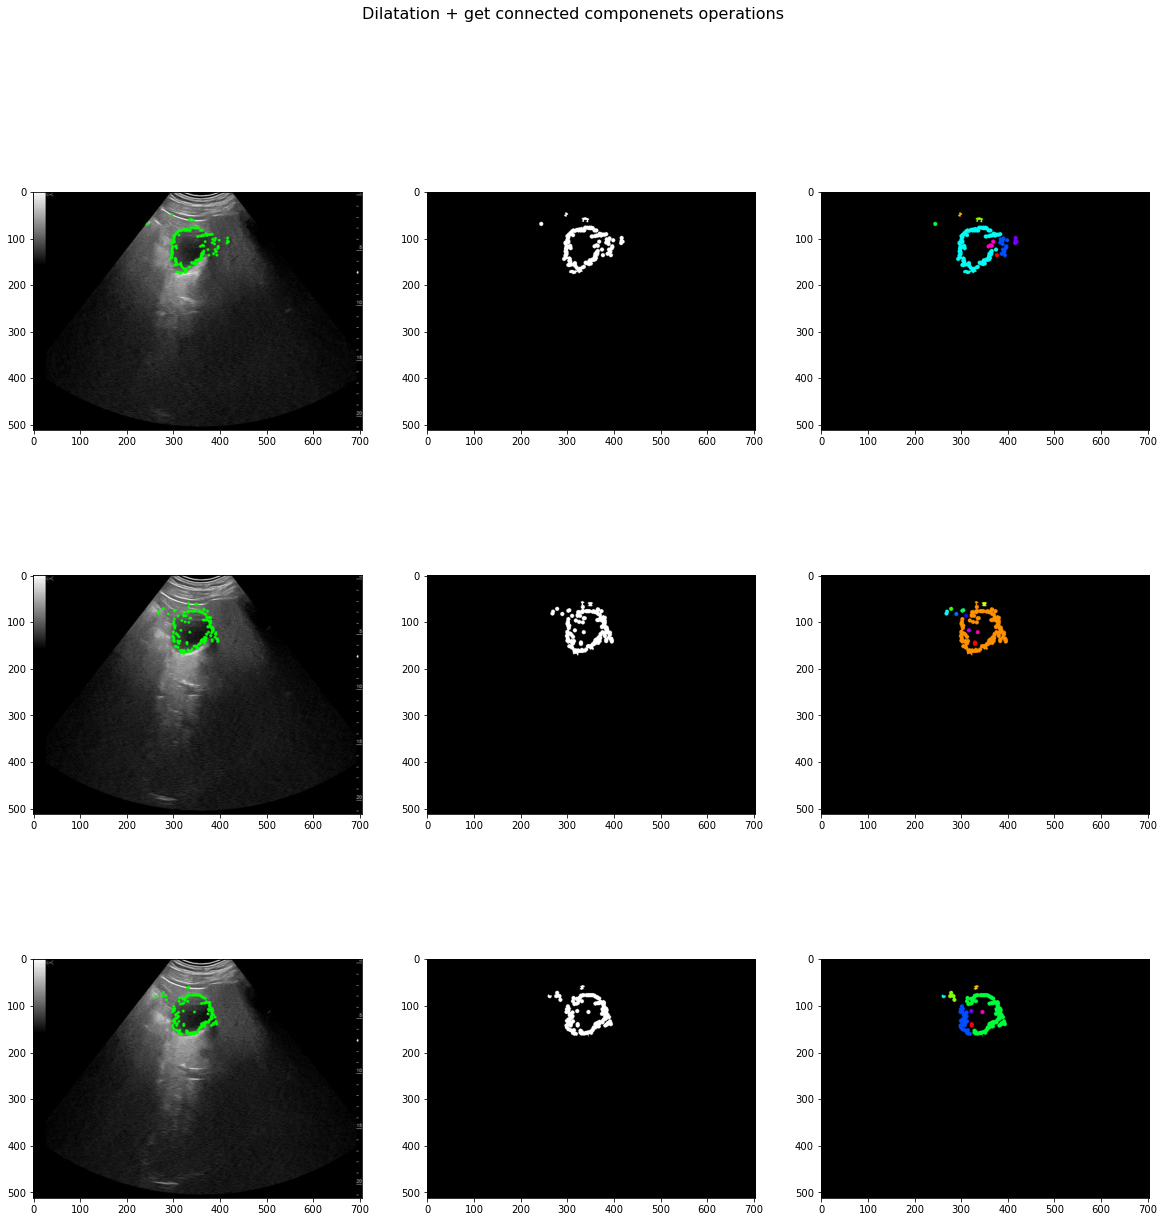

In [218]:
dataImages=[imgplt5,imgplt6,imgplt7]   #images with their initials points 
all_images=[] 
NUM_ROWS = 3
IMGs_IN_ROW = 3
lower_green=np.array([60,55,255])
upper_green=np.array([60,255,255])
dilitation_size=1


#to save all images with their diffrent transformations 
for i, image in enumerate(dataImages):
    #do dilatation
    dilatation_dst=Dilation(image,1)
    #get the green part 
    mask,res =getColorComponenet(lower_green,upper_green,dilatation_dst)
    #Compute  connected components
    #num_labels, labels_im = cv2.connectedComponents(mask,connectivity=8)
    nb_labels, labels_im, stats, centroids = cv2.connectedComponentsWithStats(mask, connectivity=8)
    labeled_img=display_components(labels_im)
    
    all_images.append(image)
    all_images.append(mask)
    all_images.append(labeled_img)

displayInLine(all_images,NUM_ROWS,IMGs_IN_ROW,"Dilatation + get connected componenets operations") 
   


    

Delete small componenets 

In [181]:
#Euclidiean distance
def Euclidiean_dist(x1,y1,x2,y2):
    return math.sqrt((x1 - x2)**2 +(y1-y2)**2)

In [182]:
def delete_small_far_components(nb_labels,labels_im,stats,min_size,centroids,CP_df,max_distance):
    sizes = stats[1:, -1] #removed background
    print("sizes before removing without background : "+ str(sizes))
    nb_labels=nb_labels-1

    centroids_list = list(centroids)         #convert to a list
    centroids_list.remove(centroids_list[0]) #remove the background centroid
    x_center=int(CP_df.get(['X Coordinate'][0]) )  #CP_df = center point data frame, get x and y center coordinate 
    y_center =int(CP_df.get(['Y Coordinate'][0]))
    distances=[]

    for i in range(len(centroids_list)):   
        x=int(centroids_list[i][0])
        y=int(centroids_list[i][1])
        distances.append(Euclidiean_dist(x,y,x_center,y_center))
    print("distances are " + str(distances))
   

    New_image = np.zeros((labels_im.shape))
    #for every component in the image, you keep it only if it's above min_size
    for i in range(0, nb_labels):
        if (sizes[i] >= min_size) and (distances[i] <= max_distance) :
            New_image[labels_im == i + 1] = 255

    return New_image,nb_labels       


In [183]:
def Process(dilatation_size,imagePoints,CP_df):
    min_size=150
    max_distance=50
    #Do dilatation
    dilatation_dst=Dilation(imagePoints,dilatation_size)
    #Get the green part
    mask,res =getColorComponenet(lower_green,upper_green,dilatation_dst)
    #Get connected componenets 
    nb_labels, labels_im, stats, centroids = cv2.connectedComponentsWithStats(mask,connectivity=8)
    #save first labled image 
    labeled_img1 = display_components(labels_im)
    #delete small components
    New_image,nb_labels=delete_small_far_components(nb_labels,labels_im,stats,min_size,centroids,CP5_df,max_distance)
    #get connected components of the second image 
    New_image=New_image.astype(np.uint8)
    nb_labels2, labels_im2, stats2, centroids2 = cv2.connectedComponentsWithStats(New_image,connectivity=8)
    labeled_img2 = display_components(labels_im2)
    #display results
    #images=[labeled_img1,labeled_img2]
    print("the was  "+ str(nb_labels) +" labels and the bacame "+str(nb_labels2) +" labels")
    #displaySideBySide(images,1,2)
    nb_labels2 = nb_labels2-1
    return nb_labels2,labeled_img2


In [184]:
nb_labels,image=Process(1,imagesPoints[1],CP5_df)
plt.imshow(image)
print(nb_labels)

sizes before removing without background : [3884   77   61   80   94   61   61   61   61   88]
distances are [12.041594578792296, 68.06614430096654, 88.72992730753249, 69.02897942168927, 92.11405973031478, 73.24616030891995, 55.31726674375732, 31.953090617340916, 13.038404810405298, 23.345235059857504]
the was  10 labels and the bacame 2 labels
1


In [185]:
def process_Morophological_gradient(image):
    grey_gradient=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)


    nb_labels, labels_im, stats, centroids = cv2.connectedComponentsWithStats(grey_gradient,connectivity=4)
    labeled_img=display_components(labels_im)


    #let only the bigger components 
    sizes = stats[1:, -1] #removed background
    print("sizes before removing without background : "+ str(sizes))
    nb_labels=nb_labels-1
    maxlabel=sizes[0]
    index_maxLabel=0
    for i in range(nb_labels):
        if(sizes[i] >= maxlabel):
            maxlabel=sizes[i]
            index_maxLabel=i

    New_image = np.zeros((labels_im.shape))
    New_image[labels_im == index_maxLabel + 1] = 255
    New_image=New_image.astype(np.uint8)
    #Apply erosion 
    #kernel = np.ones((5, 5), np.uint8)
    #New_image = cv2.erode(New_image, kernel, iterations = 1)  
    #Apply gaussian blur
    #New_image = cv2.GaussianBlur(New_image,(5,5),cv2.BORDER_DEFAULT)

    return labeled_img,New_image

In [219]:
#The Algorithm 

all_images =[]
dataImages=[imgplt5,imgplt6,imgplt7]
dataCenterPoint =[CP5_df,CP6_df,CP7_df]
final_images=[]
final_images2=[]
for i, image in enumerate(dataImages):
    d_size=2
    labels,New_image=Process(d_size,image,dataCenterPoint[i])
    while (labels !=1):
        d_size=d_size+1
        labels,New_image=Process(d_size,image,dataCenterPoint[i])


    final_images.append(New_image)
    #close the contour
    kernelcL = np.ones((9, 9), np.uint8)
    closing = cv2.morphologyEx(New_image, cv2.MORPH_CLOSE, kernelcL)
    #get morphological gradient 
    kernelgr = np.ones((7,7), np.uint8)
    morph_gr = cv2.morphologyEx(closing, cv2.MORPH_GRADIENT, kernelgr)  

    #kerneler = np.ones((3,3),np.uint8)
    #morph_gr = cv2.erode(morph_gr,kerneler,iterations = 2)
   
    

    final_images.append(closing)
    final_images.append(morph_gr)
    Morph_gradient_lb,Contour_image =process_Morophological_gradient(morph_gr)

    #Contour_image=Dilation(Contour_image,3)


    final_images2.append(Morph_gradient_lb)
    final_images2.append(Contour_image)
   
    


    print(d_size)    

displayInLine(final_images,3,3,"Dilatation + Closing contour + Morphological gradient")
displayInLine(final_images2,3,2,"Morphological gradient + Connected components")
    



sizes before removing without background : [  49   98  101 5016  238]
distances are [93.81364506296512, 69.46221994724903, 117.83462988442744, 9.486832980505138, 74.0]
the was  5 labels and the bacame 2 labels
sizes before removing without background : [2658 1582]
2
sizes before removing without background : [5040   89  229  122  101  101  134]
distances are [14.317821063276353, 68.06614430096654, 91.02197536858887, 69.02897942168927, 73.24616030891995, 13.038404810405298, 23.345235059857504]
the was  7 labels and the bacame 2 labels
sizes before removing without background : [2783 1712]
2
sizes before removing without background : [  76  328 4663   67  101    1]
distances are [70.61161377563892, 82.80096617793781, 11.180339887498949, 98.11218069128827, 16.0312195418814, 37.0]
the was  6 labels and the bacame 2 labels
sizes before removing without background : [2474 1497]
2


In [220]:
labled_img,New_image =process_Morophological_gradient(final_images[8])
displaySideBySide([labled_img,New_image],1,2, "Let only the biggest component")

sizes before removing without background : [2474 1497]


In [189]:
def get_final_contour(image_gradient,initial_image):
    nb_labels, labels_im, stats, centroids = cv2.connectedComponentsWithStats(image_gradient,connectivity=4)
    nb_labels=nb_labels-1

    green =np.array([0,255,0])
    image=initial_image.copy()
    for i in range(0, nb_labels):
            image[labels_im == i + 1] = green

    return image


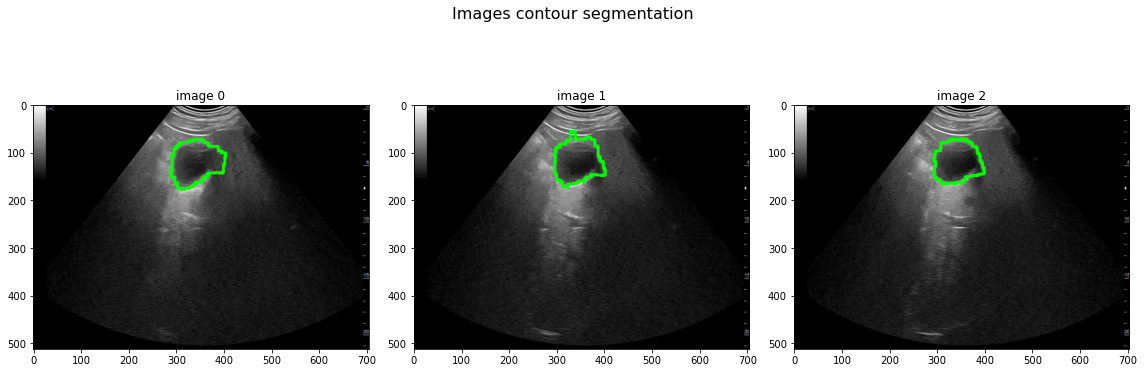

In [221]:
images_gradient =[final_images2[1],final_images2[3],final_images2[5]]
initials_images=[image5,image6,image7]
images_contours=[]
for i, image in enumerate(images_gradient):
    images_contours.append(get_final_contour(image,initials_images[i]))

displaySideBySide(images_contours,1,3,"Images contour segmentation")

In [ ]:
Method 1 ://///////////////////////////////////////////////////////////////////////////////////////////////

In [222]:

dataImages=images_contours   #images with their initials points 
all_images=[]          
NUM_ROWS = 3
IMGs_IN_ROW = 4
dilatation_size=1
dataCenterPoint =[CP5_df,CP6_df,CP7_df]
         
#to save all images with their diffrent transformations 
for i, image in enumerate(dataImages):
    #do dilatation
    dilatation_dst=Dilation(image,dilatation_size)
    #laplacian_dist=cv2.Laplacian(src,2)
    #Convert to gray scale
    grey_image=cv2.cvtColor(dilatation_dst,cv2.COLOR_BGR2GRAY)
    #Convert to binary
    binary_image=cv2.adaptiveThreshold(grey_image,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,3,4)
    #binary_image=cv2.adaptiveThreshold(grey_image,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,3,4)
    #Compute  connected components
    #num_labels, labels_im = cv2.connectedComponents(binary_image,connectivity=4)
    nb_labels, labels_im, stats, centroids = cv2.connectedComponentsWithStats(binary_image,connectivity=4)
    labeled_img=display_components(labels_im)
    all_images.append(image)
    all_images.append(binary_image)
    all_images.append(labeled_img)
    #remove small far components
    new_image1,new_labels1=delete_small_far_components(nb_labels=nb_labels,labels_im=labels_im,stats=stats,min_size=140, centroids=centroids,CP_df=dataCenterPoint[i],max_distance=60)
    new_image1=new_image1.astype(np.uint8)
    #get new labled image
    nb_labels2, labels_im2, stats2, centroids2 = cv2.connectedComponentsWithStats(new_image1,connectivity=4)
    new_labeled_img=display_components(labels_im2)
    all_images.append(new_labeled_img)

    

displayInLine(all_images,NUM_ROWS,IMGs_IN_ROW,"Contour + Adaptative thresholding + Get connected components + Remove small far componenets ")

    

sizes before removing without background : [338395      1     17     15    409      1    290     36    100     39
      1      1     16      1      1      4      3      1      2     21
      1      7      1      4      1      3      1      2      1      1
      2     25     21   5652     21      1     21     47     38     21
     45     21     21     32     43     39     21     21     21     21
     32     46     39     21     21     21     21     78      5     39
     21]
distances are [131.06105447462264, 342.24260401066374, 340.0132350365203, 335.38634438509865, 123.68508398347798, 130.6981254647518, 127.66362050325849, 376.0917441263501, 333.14261210478617, 371.2707906636341, 140.45995870709916, 122.38055401083949, 119.25183436744275, 114.00438588054409, 109.17875251164945, 111.42710621747295, 103.81714694596457, 121.49485585818027, 119.54078801814885, 361.2658301029866, 99.04039579888602, 98.03060746521976, 92.47702417357513, 90.82400563727631, 89.49301648732151, 86.14522621712709

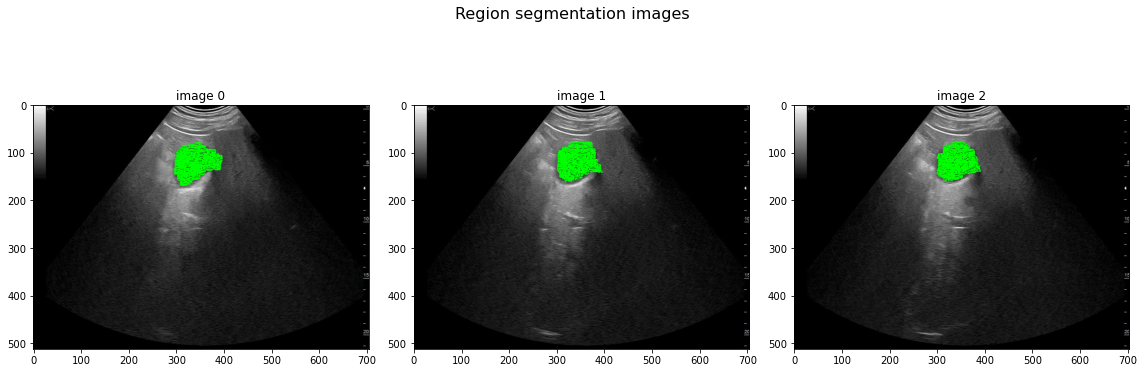

In [223]:
grey_images=[]
grey_images.append(cv2.cvtColor(all_images[3],cv2.COLOR_BGR2GRAY))
grey_images.append(cv2.cvtColor(all_images[7],cv2.COLOR_BGR2GRAY))
grey_images.append(cv2.cvtColor(all_images[11],cv2.COLOR_BGR2GRAY))

initials_images=[image5,image6,image7]
images_contours_region=[]
for i, image in enumerate(grey_images):
    images_contours_region.append(get_final_contour(image,initials_images[i]))

displaySideBySide(images_contours_region,1,3,"Region segmentation images")

In [201]:
def dice_coef(img, img2):
            if img.shape != img2.shape:
                raise ValueError("Shape mismatch: img and img2 must have to be of the same shape.")
            else:
                
                lenIntersection=0
                
                for i in range(img.shape[0]):
                    for j in range(img.shape[1]):
                        if ( np.array_equal(img[i][j],img2[i][j]) ):
                            lenIntersection+=1
                 
                lenimg=img.shape[0]*img.shape[1]
                lenimg2=img2.shape[0]*img2.shape[1]  
                value = (2. * lenIntersection  / (lenimg + lenimg2))
            return value

In [210]:
ground_truth=[]
ground_truth.append(cv2.imread(os.path.join(file_path,"5_Vesicule_VT.jpg")))
ground_truth.append(cv2.imread(os.path.join(file_path,"6_Vesicule_VT.jpg")))
ground_truth.append(cv2.imread(os.path.join(file_path,"7_Vesicule_VT.jpg")))

dicesValues=[]
for i, image in enumerate(images_contours):
    dicesValues.append(dice_coef(image,ground_truth[i]))



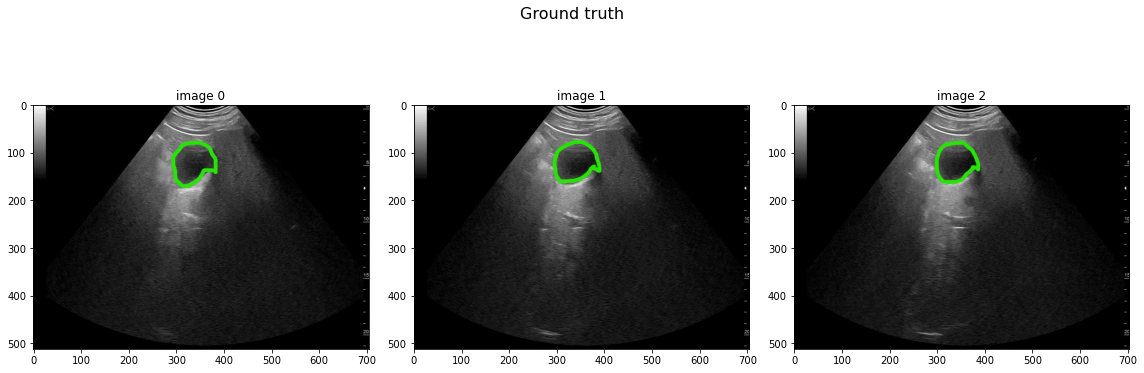

                                            [0.9267023259943182, 0.9292963201349432, 0.9290826970880682]


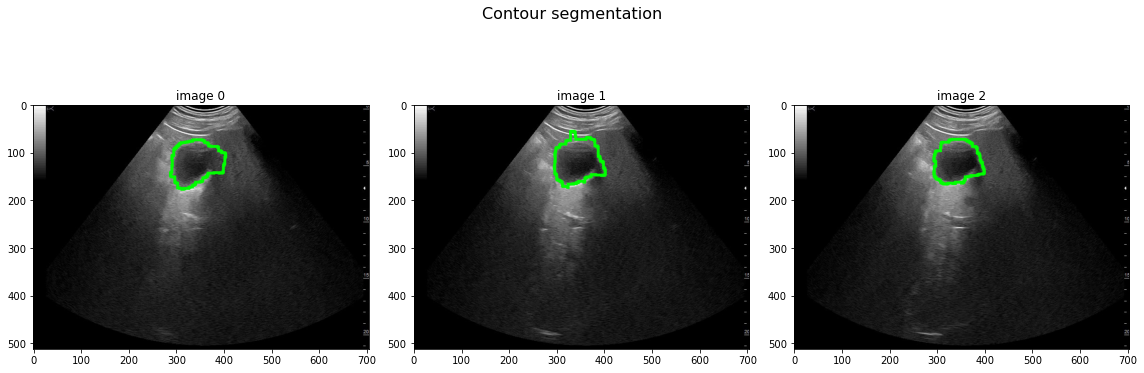

In [224]:

displaySideBySide(ground_truth,1,3,"Ground truth")
print("                                            " + str(dicesValues))
displaySideBySide(images_contours,1,3,"Contour segmentation")